In [ ]:
##########################################################
# DSC5103 Statistics
# Session 5. Demo of logistic regression on the Credit Card Default data
# 2016.11
#
##########################################################

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [3]:
#############################
### load Credit Card Default data
#############################
Default = pd.read_csv('Default.csv')

In [4]:
Default.keys()

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [5]:
Default.shape

(10000, 4)

In [6]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
# summary
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [8]:
#############################
### logistic regression
#############################

In [9]:
## Logistic regression 1: default ~ balance
# link="logit" is default and can be omitted 
# Binomial by default the link is Logit
# http://statsmodels.sourceforge.net/devel/glm.html
# relevel of dependent variable is not clear yet
glm1a = glm('default ~ balance', data=Default, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(glm1a.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9998
Model Family:                             Binomial   Df Model:                            1
Link Function:                               logit   Scale:                             1.0
Method:                                       IRLS   Log-Likelihood:                -798.23
Date:                             Thu, 24 Nov 2016   Deviance:                       1596.5
Time:                                     22:15:17   Pearson chi2:                 7.15e+03
No. Iterations:                                 11                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     

In [10]:
# convert dummy into binary
Default['defaultyes'] = (Default.default == 'Yes')*1
glm1b = glm('defaultyes ~ balance', data=Default, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(glm1b.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultyes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Thu, 24 Nov 2016   Deviance:                       1596.5
Time:                        22:15:21   Pearson chi2:                 7.15e+03
No. Iterations:                    11                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000       -11.359    -9.943
balance        0.0055      0.000     24.952      0.0

In [11]:
# alternatively we can use the logit function direclty
logit1 = logit('defaultyes ~ balance', data=Default).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             defaultyes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Nov 2016   Pseudo R-squ.:                  0.4534
Time:                        22:15:26   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000       -11.359    -9.943
balance        0.0055      0

In [12]:
p = glm1b.params
print(p)

Intercept   -10.651331
balance       0.005499
dtype: float64


In [13]:
# calculate predicted default probabilities for data
# this needs to be done manually
newdata = pd.DataFrame(np.arange(1000, 2001, 1000), columns=['balance'])
p = glm1b.params
eta = p['Intercept'] + newdata*p['balance']
y = np.exp(eta)/(1 + np.exp(eta))
print(y)

    balance
0  0.005752
1  0.585769


In [14]:
## Logistic regression 2: default ~ student
glm2 = glm('defaultyes ~ student', data=Default, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(glm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultyes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1454.3
Date:                Thu, 24 Nov 2016   Deviance:                       2908.7
Time:                        22:16:06   Pearson chi2:                 1.00e+04
No. Iterations:                     8                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000        -3.643    -3.366
student[T.Yes]     0.4049      0.115    

In [15]:
## Logistic regression 3: default ~ .
glm3 = glm('defaultyes ~ student + balance + income', data=Default, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(glm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultyes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Thu, 24 Nov 2016   Deviance:                       1571.5
Time:                        22:16:10   Pearson chi2:                 7.00e+03
No. Iterations:                    11                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000       -11.834    -9.904
student[T.Yes]    -0.6468      0.236    

In [16]:
## model selectin by AIC
# http://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f
import itertools
predictorcols = Default.drop(['default', 'defaultyes'], axis = 1)
data = Default
AICs = {}
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = list(variables)
        i = True
        independent =''
        for p in predictors:
            if i:
                independent = p
                i=False
            else:
                independent+='+ {}'.format(p)
        regresion = 'defaultyes ~ {}'.format(independent)
        res = logit(regresion, data=data).fit()
        AICs[variables] = 2*(k+1) - 2*res.llf
print(min(AICs, key=AICs.get))

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.145834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.145375
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
('student', 'balance')


In [17]:
## best model
glm4 = glm('defaultyes ~ student + balance', data=Default, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(glm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultyes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -785.84
Date:                Thu, 24 Nov 2016   Deviance:                       1571.7
Time:                        22:16:49   Pearson chi2:                 7.03e+03
No. Iterations:                    11                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000       -11.473   -10.026
student[T.Yes]    -0.7149      0.148    

In [18]:
#############################
### classification
#############################

In [19]:
## categorical prediction (use fixed cutoff = 0.5)
Default['glm4_prob'] = glm4.predict()
Default['glm4_pred'] = [ "Yes" if x > 0.5 else "No" for x in Default.glm4_prob]

In [20]:
Default.head()

,default,student,balance,income,defaultyes,glm4_prob,glm4_pred
0,No,No,729.526495,44361.625074,0,0.001409,No
1,No,Yes,817.180407,12106.134700,0,0.001140,No
2,No,No,1073.549164,31767.138947,0,0.010057,No
3,No,No,529.250605,35704.493935,0,0.000447,No
4,No,No,785.655883,38463.495879,0,0.001943,No


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Default.default, Default.glm4_pred))

[[9628   39]
 [ 228  105]]


In [22]:
print(classification_report(Default.default, Default.glm4_pred, digits=3))
# recall = True Positive Rate = (true positive / observed positive)
# precision = (true positive / predicted positive)
## F1 score gives us the Harmonic Score of Precision and Recall
## Many analysts will try and find a classifier that maximizes this score
## since it tries to minimize both false positives and false negatives simultaneously
## and is thus a bit more precise in what it is trying to do than the accuracy
## F1 = 2*Recall*Precision / (Recall+Precision)

             precision    recall  f1-score   support

         No      0.977     0.996     0.986      9667
        Yes      0.729     0.315     0.440       333

avg / total      0.969     0.973     0.968     10000



In [23]:
from sklearn.metrics import roc_curve, auc
roc_curve(Default.defaultyes, Default.glm4_prob)
fpr, tpr, thresholds=roc_curve(Default.defaultyes, Default.glm4_prob)

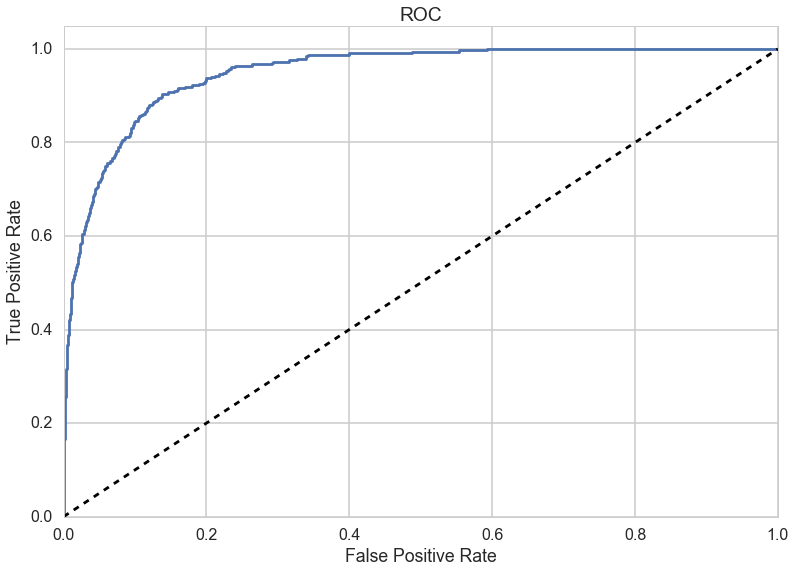

In [24]:
ax=plt.gca()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')

In [25]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.949547561423
